# Datasets to download
Here we list a few datasets, that might be interesting to explore with vaex

## New york taxi dataset

See for instance [Analyzing 1.1 Billion NYC Taxi and Uber Trips, with a Vengeance](http://toddwschneider.com/posts/analyzing-1-1-billion-nyc-taxi-and-uber-trips-with-a-vengeance/) for some ideas.

 * [Year: 2015 - 146 million rows - 23GB](
https://drive.google.com/file/d/0B8gjQokMGa4nTXc0Z3QyYjZBMWc/view?usp=sharing
)
 * [Year 2009-2015 - 1 billion rows - 135GB](
https://drive.google.com/file/d/0B8gjQokMGa4nODJjbjlURmtvZTA/view?usp=sharing
)

In [2]:
import vaex

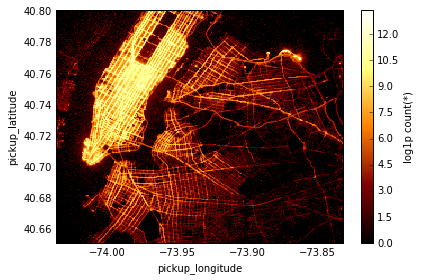

In [12]:
ds = vaex.open("/Users/users/breddels/.vaex/data/nyc_taxi/nyc_taxi2015.hdf5")
ds.plot(ds.col.pickup_longitude, ds.col.pickup_latitude, f="log1p", show=True, limits="96%");

## SDSS - dereddened

Only: `ra`, `dec`, `g`, `r`, `g_r` (deredenned using Schlegel maps).

The original query at [SDSS archive](https://www.sdss.org/) was (although split in small parts): 
```
SELECT ra, dec, g, r from PhotoObjAll WHERE type = 6 and  clean = 1 and r>=10.0 and r<23.5;
```



 * [162 million rows - 10GB](https://drive.google.com/file/d/0B8gjQokMGa4nUlRnZFlXSlZXOTQ/view?usp=sharing)

/Users/maartenbreddels/vaex/src/vaex/vaex/dataset.py:2071: RuntimeWarning: divide by zero encountered in log
  fgrid = f(grid)
/Users/maartenbreddels/anaconda3/lib/python3.5/site-packages/numpy/core/numeric.py:190: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  a = empty(shape, dtype, order)


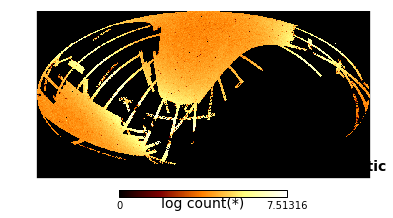

In [22]:
sdss = vaex.open("/Users/maartenbreddels/vaex/data/sdss/sdss_dereddened.hdf5")
sdss.healpix_plot(sdss.col.healpix, show=True, f="log", healpix_max_level=9, healpix_level=9,
                healpix_input='galactic', healpix_output='galactic', rotation=(0,45)
               )

## Gaia

See the [Gaia Science Homepage for details](http://www.cosmos.esa.int/web/gaia/home), and you may want to try the [Gaia Archive](https://archives.esac.esa.int/gaia) for ADQL (SQL like) queries.

 * Gaia data release 2 (DR1)
    * [Full Gaia DR2 - 1.7 billion rows 1.2TB](https://drive.google.com/file/d/1f4-TYToFE4OCFxF99IxsAWm8_-5QxmTV/view?usp=sharing)
    * Split in two sets of columns:
       * [All astrometry and error (without covariances), radial velocity and basic photometry - 253 GB](TODO)
       * [Everything not contained in the above - 1 TB](TODO)
    * [Only with radial velocities - 7 million - 5.2GB](https://drive.google.com/file/d/1f4-TYToFE4OCFxF99IxsAWm8_-5QxmTV/view?usp=sharing)
 * Gaia data release 1 (DR1)
    * [Full Gaia DR1 - 1 billion row - 351GB](https://drive.google.com/file/d/0B8gjQokMGa4nUVc1bURQWVJNcnM/view?usp=sharing)
    * [A few columns of Gaia DR1  - 1 billion row - 88GB](https://drive.google.com/file/d/0B8gjQokMGa4nOF9YT2s5TE1aeW8/view?usp=sharing)
    * [10% of Gaia DR1 - 1 billion row - 35GB](https://drive.google.com/file/d/0B8gjQokMGa4nZWRvVXY5blQyaDg/view?usp=sharing)
    * [TGAS (subset of DR1 with proper motions) - 662MB](http://vaex.astro.rug.nl/data/tgas.hdf5)


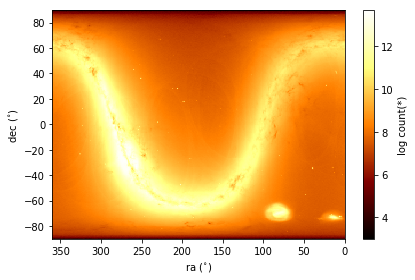

In [3]:
gaia = vaex.open("/data/users/gaia/gaia-dr2/gaia-dr2-sort-by-source_id.hdf5")
gaia.plot("ra", "dec", f="log", limits=[[360, 0], [-90, 90]], show=True);

## Helmi & de Zeeuw 2000
Result of an N-body simulation of the accretion of 33 satellite galaxies into a Milky Way dark matter halo
 * [3 million rows - 252MB](http://vaex.astro.rug.nl/data/helmi-dezeeuw-2000-FeH.hdf5)

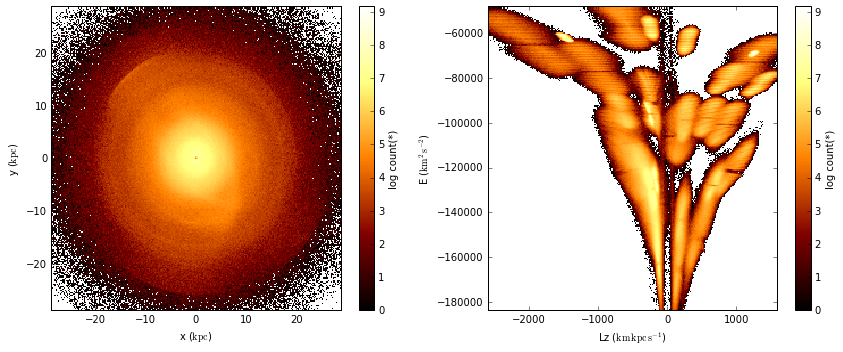

In [26]:
hdz = vaex.datasets.helmi_de_zeeuw.fetch() # this will download it on the fly
hdz.plot([["x", "y"], ["Lz", "E"]], f="log", figsize=(12,5), show=True);